<a href="https://colab.research.google.com/github/sathiyasudan/Benign/blob/master/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import model_selection,linear_model, metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
#Function to Load data
def load_data(filename):
    credit = pd.read_csv(filename)
    return credit

In [ ]:
#loading the dataset
credit = load_data('credit_risk_dataset.csv')
credit_copy = credit.copy(deep=True)

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
credit.describe().T


,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
Null_per = credit.isnull().sum()/credit.shape[0]*100
Null_per.round(2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

Obeservation:

Only two columns of data contains NaN,
person_emp_length contains 2.75% NaN and loan_int_rate contains 9.56% NaN

In [ ]:
# fill NaN with the mode
credit['person_emp_length'].fillna(credit['person_emp_length'].mode()[0], inplace=True)
credit['loan_int_rate'].fillna(credit['loan_int_rate'].median(), inplace=True)

# check the nans are replaced 
credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
#Proportion of Loan status Target Variable 
import plotly.express as exp
exp.pie(credit,names='loan_status',title='Propotion Of Loan Status',hole=0.33)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ed6cc8210>,
      dtype=object)

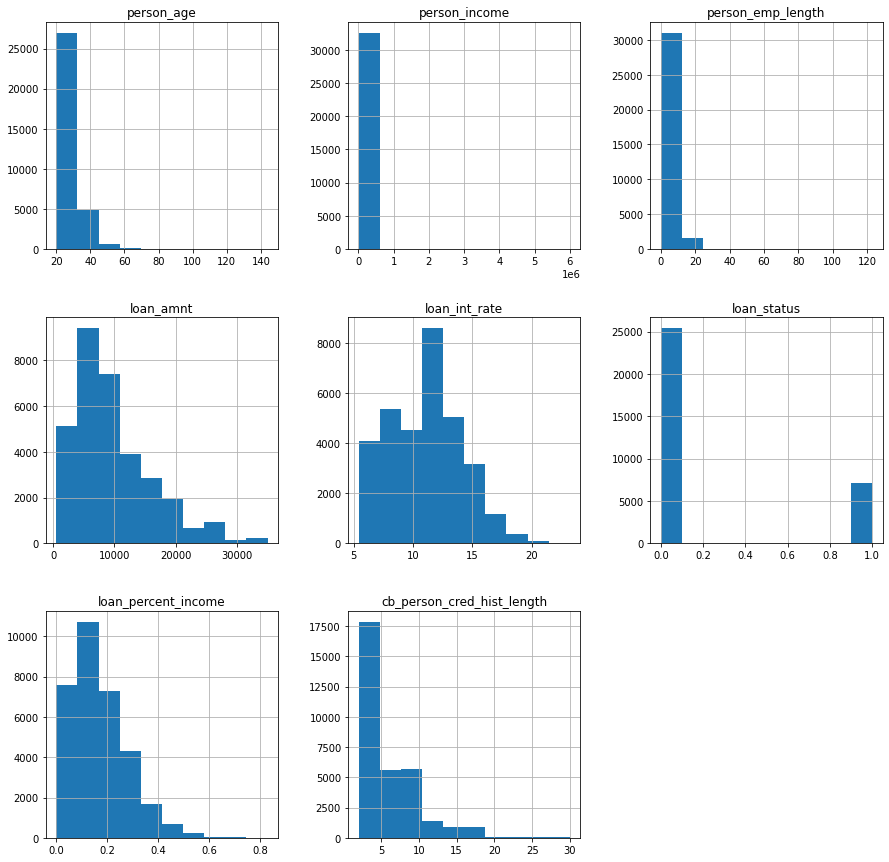

In [ ]:
#creating seperate lists for categorical and numerical variables
numerical = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical = ['person_home_ownership', 'loan_intent','loan_grade','loan_status','cb_person_default_on_file']

credit.hist(figsize=(15,15))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

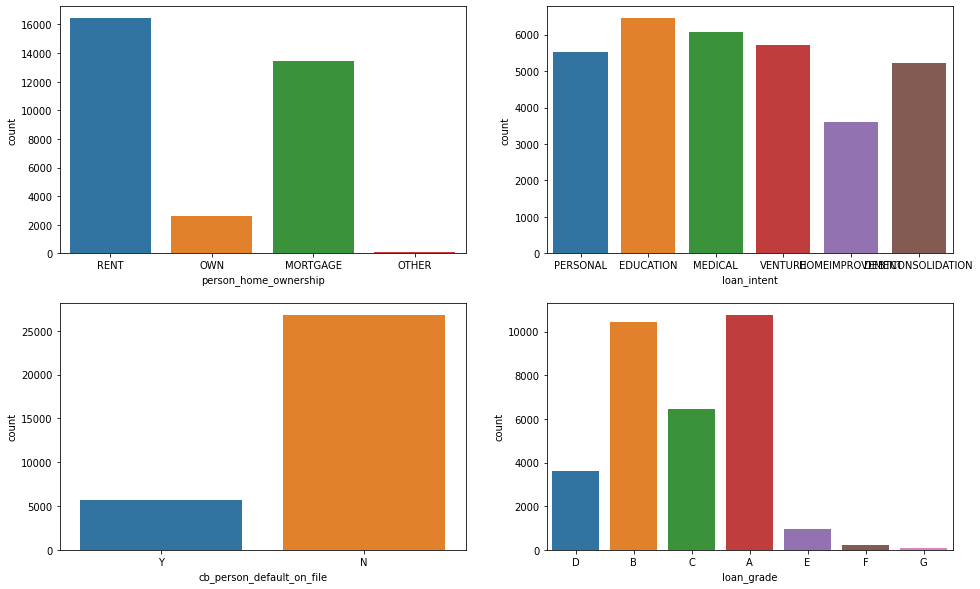

In [ ]:
# Countplot of all Categorical variables

fig,axes = plt.subplots(2,2, figsize=(16,10))

sns.countplot('person_home_ownership',data=credit,ax=axes[0,0])
sns.countplot('loan_intent',data=credit,ax=axes[0,1])
sns.countplot('loan_grade',data=credit,ax=axes[1,1])
sns.countplot('cb_person_default_on_file',data=credit,ax=axes[1,0])

In [ ]:
#Finding Outliers
def finding_outliers(credit, col):
    Q1 = credit[col].quantile(0.25)
    Q3 = credit[col].quantile(0.75)
    IQR = Q3 - Q1
    return credit[(credit[col] < Q1 - 1.5*IQR) | (credit[col] > Q3 + 1.5*IQR)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



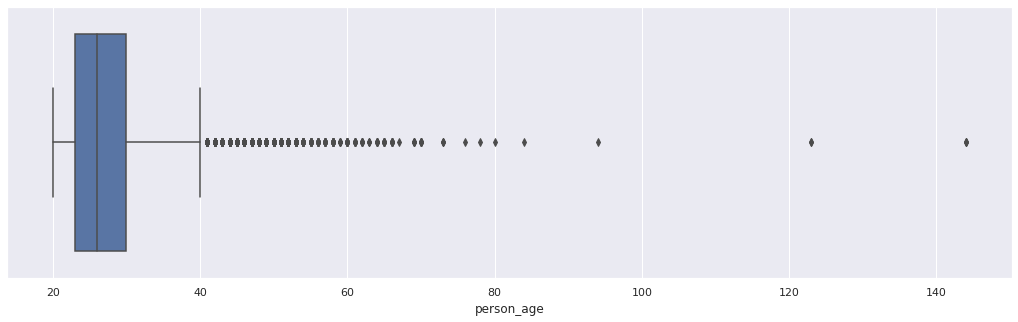

In [ ]:
#Box plot to visualize the outliers column
#Uni-variate BOX plot

sns.set(rc = {"figure.figsize" : (18,5)})
sns.boxplot(credit["person_age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



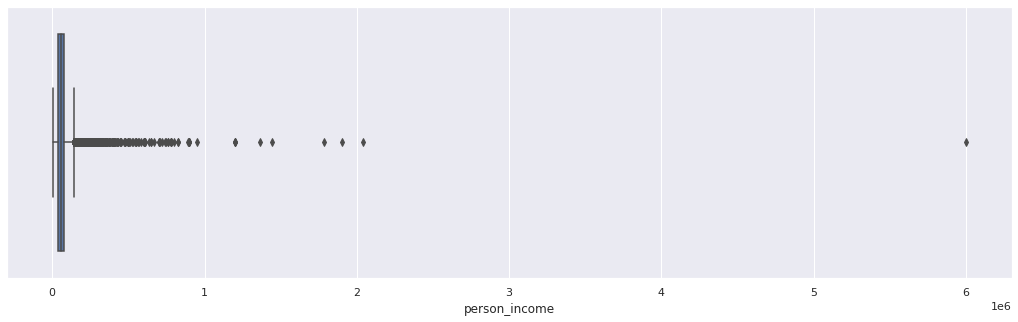

In [ ]:
#Uni-variate BOX plot for person_income
sns.boxplot(credit["person_income"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



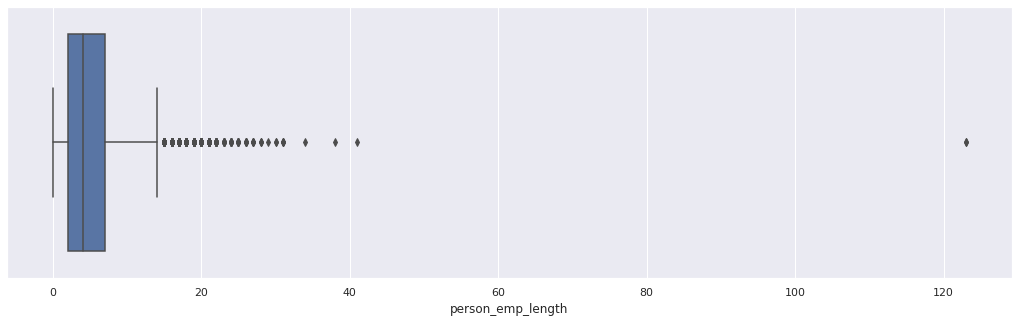

In [ ]:
# Uni - Variate Outliers


# Method - III ( Uni - Variate Box - Plot)


sns.boxplot(credit["person_emp_length"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



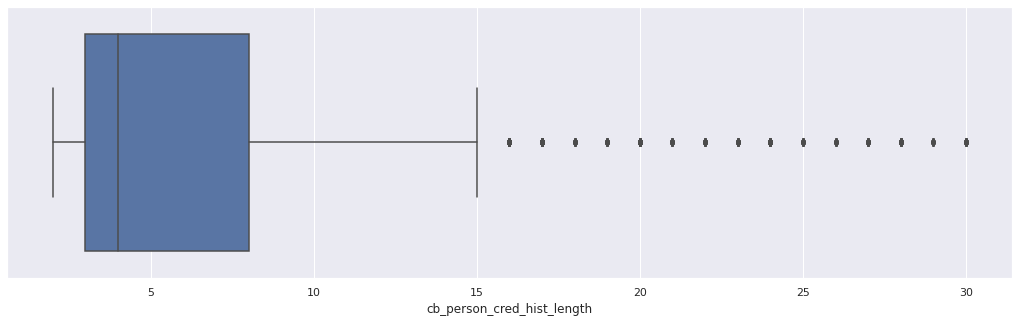

In [ ]:
# Uni - Variate Outliers


# Method - III ( Uni - Variate Box - Plot)
sns.boxplot(credit["cb_person_cred_hist_length"])

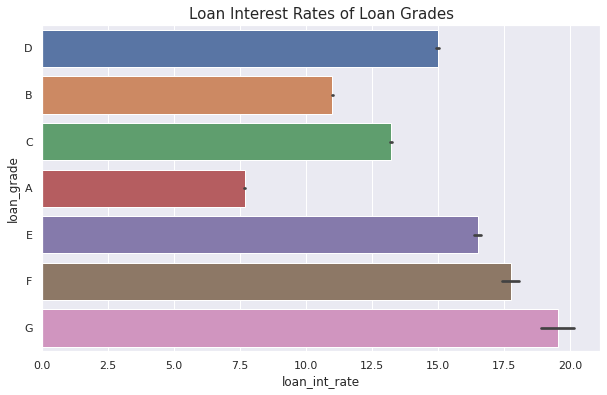

In [ ]:
#Barplot for Loan Interest rate Vs Loan Grades
plt.figure(figsize=(10,6))
sns.barplot(x=credit["loan_int_rate"], y=credit["loan_grade"])
plt.title("Loan Interest Rates of Loan Grades", size=15)
plt.show()

In [ ]:
#Outliers columns
outlier_col = ["person_age","person_income","person_emp_length","cb_person_cred_hist_length"]
for col in outlier_col:
    print(finding_outliers(credit, col).shape)

(1494, 12)
(1484, 12)
(853, 12)
(1142, 12)


In [ ]:
#Removing Outliers using Inter-quantile range
'''def removing_outliers(credit, col):
    Q1 = credit[col].quantile(0.25)
    Q3 = credit[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    credit[col] = np.where(credit[col]>upper_range, upper_range,credit[col])
    credit[col] = np.where(credit[col]<lower_range, lower_range, credit[col])
    return credit

for col in outlier_col:
    removing_outliers(credit, col) ''' 

'def removing_outliers(credit, col):\n    Q1 = credit[col].quantile(0.25)\n    Q3 = credit[col].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_range = Q1 - 1.5*IQR\n    upper_range = Q3 + 1.5*IQR\n    credit[col] = np.where(credit[col]>upper_range, upper_range,credit[col])\n    credit[col] = np.where(credit[col]<lower_range, lower_range, credit[col])\n    return credit\n\nfor col in outlier_col:\n    removing_outliers(credit, col) '

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

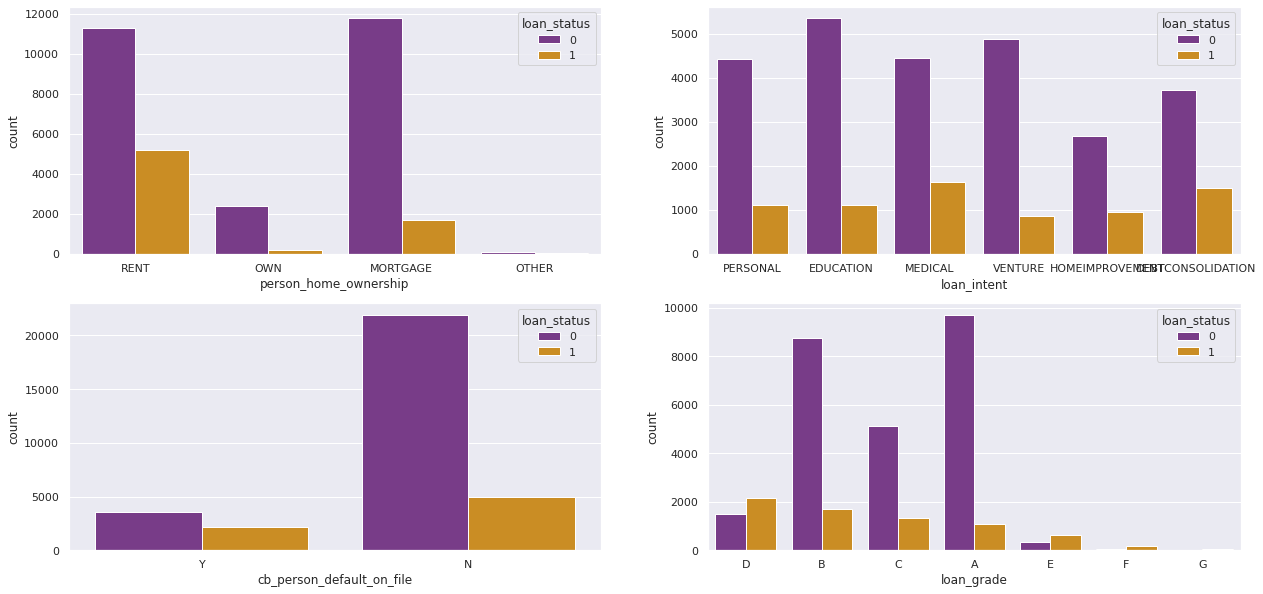

In [ ]:
#Comparing Loan status with all Four categorical values 
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot('person_home_ownership',hue="loan_status",data=credit,ax=axes[0,0],palette='CMRmap')
sns.countplot('loan_intent',data=credit,hue="loan_status",ax=axes[0,1],palette='CMRmap')
sns.countplot('loan_grade',data=credit,hue="loan_status",ax=axes[1,1],palette='CMRmap')
sns.countplot('cb_person_default_on_file',hue="loan_status",data=credit,ax=axes[1,0],palette='CMRmap')

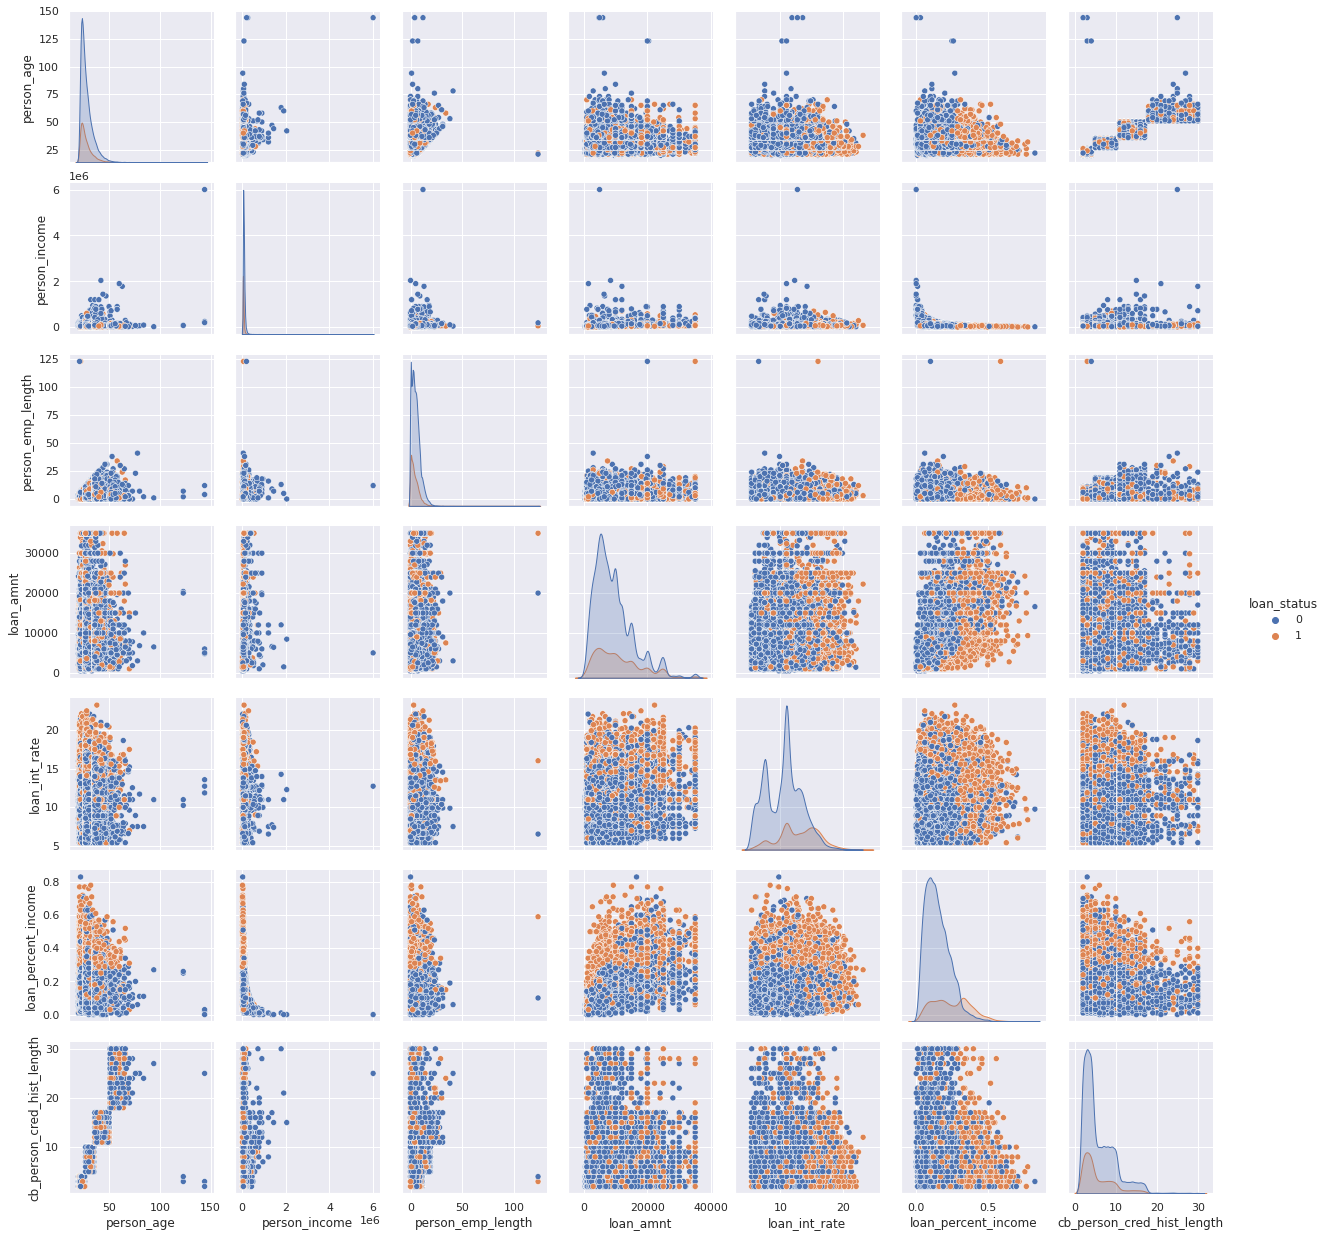

In [ ]:
#pairplot for all predictior varaible with hue Target variable
sns.pairplot(credit,hue="loan_status")

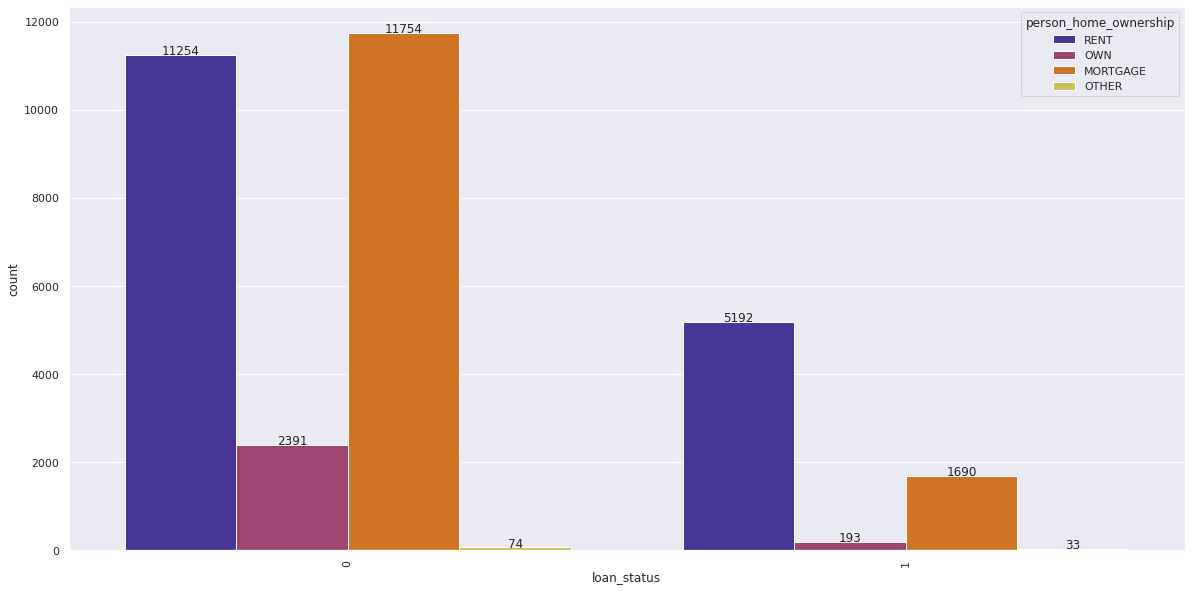

In [ ]:
#Person Home Ownership with Loan default status
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="person_home_ownership",data=credit, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
# Correlation Matrix

corr_matrix = credit.corr(method = "pearson" )   # other Method Options = method : {'pearson', 'kendall', 'spearman'}

corr_matrix.style.background_gradient(cmap='Greens')

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.160520,0.050787,0.011853,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.142124,0.266820,0.000746,-0.144449,-0.254471,0.117987
person_emp_length,0.160520,0.142124,1.000000,0.122518,-0.042648,-0.086953,-0.058372,0.141760
loan_amnt,0.050787,0.266820,0.122518,1.000000,0.139483,0.105376,0.572612,0.041967
loan_int_rate,0.011853,0.000746,-0.042648,0.139483,1.000000,0.319360,0.114514,0.015762
loan_status,-0.021629,-0.144449,-0.086953,0.105376,0.319360,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.058372,0.572612,0.114514,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.141760,0.041967,0.015762,-0.015529,-0.031690,1.000000


In [ ]:
# one hot encoding categorical variables
#Label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
credit['person_home_ownership'] = label_encoder.fit_transform(credit['person_home_ownership'])
credit['loan_intent'] = label_encoder.fit_transform(credit['loan_intent'])
credit['loan_grade'] = label_encoder.fit_transform(credit['loan_grade'])
credit['cb_person_default_on_file'] = label_encoder.fit_transform(credit['cb_person_default_on_file'])
#'person_home_ownership', 'loan_intent','loan_grade','loan_status','cb_person_default_on_file'
#num_col = credit.select_dtypes(exclude = 'object')
#char_col = credit.select_dtypes(include = 'object')

#encoded_char_col = pd.get_dummies(char_col)

#credit2 = pd.concat([num_col, encoded_char_col], axis=1)
credit2 = credit
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [ ]:
!pip install dataframe_image
import dataframe_image as dfi

dfi.export(
    credit2,
    "table.png",
    table_conversion="matplotlib",
    max_rows = 15
)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


In [ ]:
# Split Train and Test Sets without one hot enocoding
label = credit['loan_status'] # labels
features = credit.drop('loan_status',axis=1) # features
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, label, 
                                                                    random_state=42, test_size=.30)
print('The train dataset has {} data\nThe test dataset has {} data'.
      format(x_train.shape[0], x_test.shape[0]))

The train dataset has 22806 data
The test dataset has 9775 data


In [ ]:
#K - Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier


KNN = KNeighborsClassifier(n_neighbors=150)
KNN.fit(x_train, y_train)
KNN_preds = KNN.predict(x_test)
KNN_preds_proba = KNN.predict_proba(x_test)
print(classification_report(y_test, KNN.predict(x_test)))

log_roc = roc_auc_score(y_test,KNN_preds)
log_acc = accuracy_score(y_test,KNN_preds)

print('ROC score for KNN model: %.2f%%'% (log_roc*100))
print('Prediction Accuracy score for KNN model: %.2f%%'% (log_acc*100))


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7613
           1       0.74      0.38      0.50      2162

    accuracy                           0.83      9775
   macro avg       0.79      0.67      0.70      9775
weighted avg       0.82      0.83      0.81      9775

ROC score for logistic regression model: 67.21%
Prediction Accuracy score for logistic regression model: 83.37%


In [ ]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(KNN_preds), labels=[0, 1]).ravel()
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 827
True Negative 7322
False Positive 291
False Negative 1335


In [ ]:
#Logistic Regression
lg = LogisticRegression(random_state=42)

lg.fit(x_train, y_train)
preds = lg.predict(x_test)
preds_proba = lg.predict_proba(x_test)
print('Logistic Regression', '\n',classification_report(y_test, lg.predict(x_test)))


Logistic Regression 
               precision    recall  f1-score   support

           0       0.80      0.98      0.89      7613
           1       0.74      0.16      0.26      2162

    accuracy                           0.80      9775
   macro avg       0.77      0.57      0.57      9775
weighted avg       0.79      0.80      0.75      9775



In [ ]:
log_roc = roc_auc_score(y_test,preds)
log_acc = accuracy_score(y_test,preds)

print('ROC score for logistic regression model: %.2f%%'% (log_roc*100))
print('Prediction Accuracy score for logistic regression model: %.2f%%'% (log_acc*100))


ROC score for logistic regression model: 57.04%
Prediction Accuracy score for logistic regression model: 80.10%


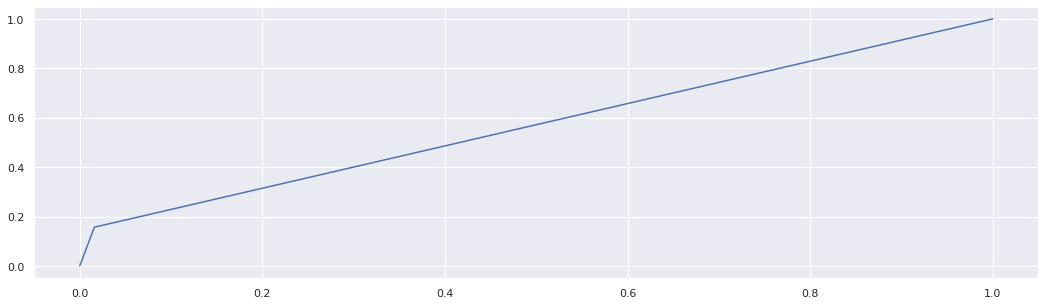

In [ ]:
from sklearn.metrics import roc_curve
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, preds, pos_label=1)
#fpr2, tpr2, thresh2 = roc_curve(y_test, preds, pos_label=1)

plt.plot(fpr1, tpr1, label=f'Logistic Regression, AUC = {str(round(log_roc,3))}')

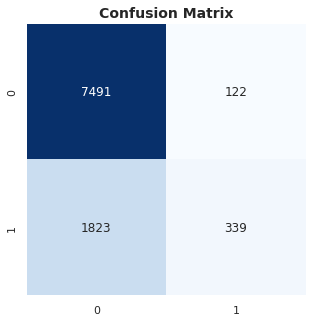

In [ ]:
#Confusion matrix for logistic regression
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,preds), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14, fontweight='bold')

plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(preds), labels=[0, 1]).ravel()
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 339
True Negative 7491
False Positive 122
False Negative 1823


In [ ]:
from sklearn.metrics import precision_score,recall_score, f1_score
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
fscore = f1_score(y_test, preds)

print('Accuracy predicted: %.2f%%' % (accuracy * 100.0))
print('Precision: %.2f%%' % (precision * 100.0))
print('Recall: %.2f%%' % (recall * 100.0))
print('F1_score: %.2f%%' % (fscore * 100.0))

Accuracy predicted: 80.10%
Precision: 73.54%
Recall: 15.68%
F1_score: 25.85%


In [ ]:
#XG Boost

xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42) 

xgb.fit(x_train, y_train)
preds_xgb = xgb.predict(x_test)
preds_proba = xgb.predict_proba(x_test)
print('XG Boost', '\n',classification_report(y_test, xgb.predict(x_test)))

XG Boost 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      7613
           1       0.95      0.69      0.80      2162

    accuracy                           0.92      9775
   macro avg       0.93      0.84      0.88      9775
weighted avg       0.93      0.92      0.92      9775



In [ ]:
xgb_roc = roc_auc_score(y_test,preds_xgb)
xgb_acc = accuracy_score(y_test,preds_xgb)

print('ROC score for XGBoost: %.2f%%'% (xgb_roc*100))
print('Accuracy score for XGBoost: %.2f%%'% (xgb_acc*100))

ROC score for XGBoost: 84.08%
Accuracy score for XGBoost: 92.36%


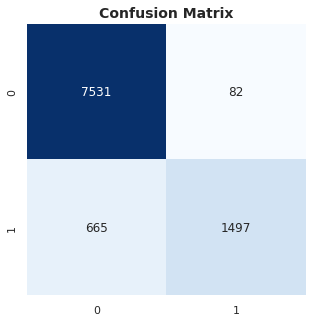

In [ ]:
#Confusion matrix for XGBoost
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,preds_xgb), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14, fontweight='bold')

plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(preds_xgb), labels=[0, 1]).ravel()
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 1497
True Negative 7531
False Positive 82
False Negative 665


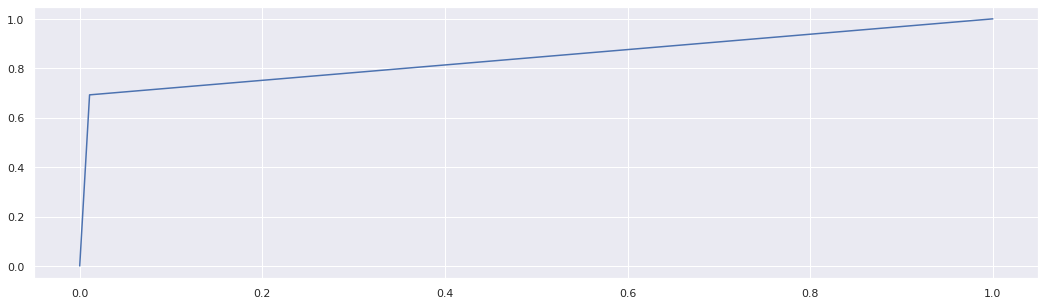

In [ ]:
# roc curve for models
#fpr1, tpr1, thresh1 = roc_curve(y_test, preds, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, preds_xgb, pos_label=1)

plt.plot(fpr2, tpr2, label=f'Random Forest Classifier, AUC = {str(round(xgb_roc,3))}')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
#Randomized search for XG Boost
params = {
    "colsample_bytree": uniform(0.9, 0.1), # 0.9-1 0.9 is the lower bound, 0.1 is the range
    "gamma": uniform(0.2, 0.3),# 0.2-0.5
    "learning_rate": uniform(0.2, 0.2), # 0.2-0.4 
    "max_depth": randint(4, 6), # 4, 5, 6
    "n_estimators": randint(100, 300), # 100-300
    "subsample": uniform(0.9, 0.1) # 0.9-1
}

Random_CV = RandomizedSearchCV(xgb, param_distributions=params, random_state=42, 
                            n_iter=100, cv=3, verbose=2, n_jobs=16, return_train_score=True)

Random_CV.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(random_state=42), n_iter=100,
                   n_jobs=16,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f597c3c7490>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f597c3c7690>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f597c3c7650>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f597c377150>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f597c3775d0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f597c40aa50>},
                   random_state=42, return_train_score=True, verbose=2)

In [ ]:
#Accuracy score prediction using hyper paramters tuned XGBoost model

Random_best_xgb = Random_CV.best_estimator_
Random_best_xgb.fit(x_train, y_train) 
preds_proba_Random = Random_best_xgb.predict_proba(x_test)

#Random_bestauc = roc_auc_score(y_test, preds_proba_Random)
probs_Random = preds_proba_Random[:, 1]
accuracy_Xgb = roc_auc_score(y_test, probs_Random)


#print('xgb best model using RandomizedSearchCV AUROC socre:{}'.format(Random_bestauc))
print('XGBoost ROC score after hyper parameter tuning:{}'.format(accuracy_Xgb))

XGBoost ROC score after hyper parameter tuning:0.9510596619322831


In [ ]:
#Random Forest Classifier

RandomF = RandomForestClassifier()

RandomF.fit(x_train, y_train)
preds_rf = RandomF.predict(x_test)
preds_proba = RandomF.predict_proba(x_test)
print('Random Forest classifier', '\n',classification_report(y_test, RandomF.predict(x_test)))

Random Forest classifier 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      7613
           1       0.97      0.70      0.82      2162

    accuracy                           0.93      9775
   macro avg       0.95      0.85      0.89      9775
weighted avg       0.93      0.93      0.93      9775



In [ ]:
rf_roc = roc_auc_score(y_test,preds_rf)
rf_acc = accuracy_score(y_test,preds_rf)

print('ROC score for RF: %.2f%%'% (rf_roc*100))
print('Accuracy score for RF: %.2f%%'% (rf_acc*100))

ROC score for RF: 84.88%
Accuracy score for RF: 92.96%


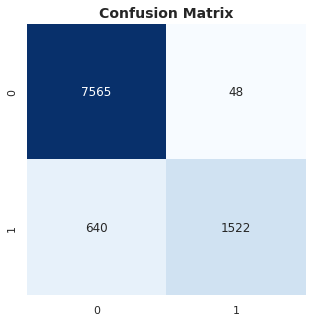

In [ ]:
#Confusion matrix for RF
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,preds_rf), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14, fontweight='bold')

plt.show()

In [ ]:
tn, fp, fn, tp = confusion_matrix(list(y_test), list(preds_rf), labels=[0, 1]).ravel()
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 1522
True Negative 7565
False Positive 48
False Negative 640


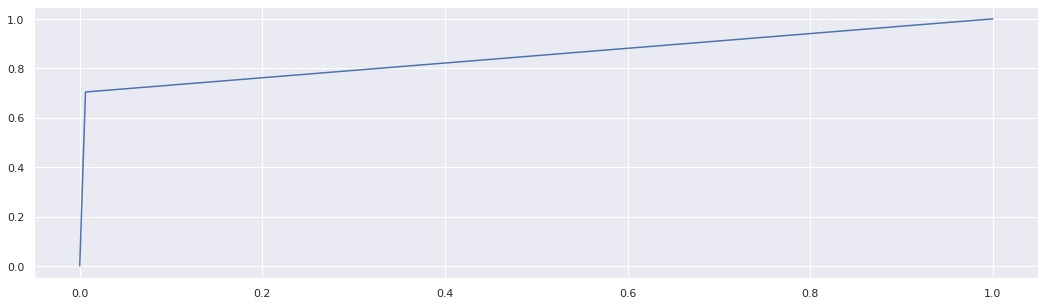

In [ ]:
# roc curve for models
#fpr1, tpr1, thresh1 = roc_curve(y_test, preds, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, preds_rf, pos_label=1)

plt.plot(fpr3, tpr3, label=f'Random Forest Classifier, AUC = {str(round(rf_roc,3))}')

Feature: 0, Score: 0.04413
Feature: 1, Score: 0.15028
Feature: 2, Score: 0.09807
Feature: 3, Score: 0.06531
Feature: 4, Score: 0.07441
Feature: 5, Score: 0.12564
Feature: 6, Score: 0.07711
Feature: 7, Score: 0.10060
Feature: 8, Score: 0.21918
Feature: 9, Score: 0.01013
Feature: 10, Score: 0.03514


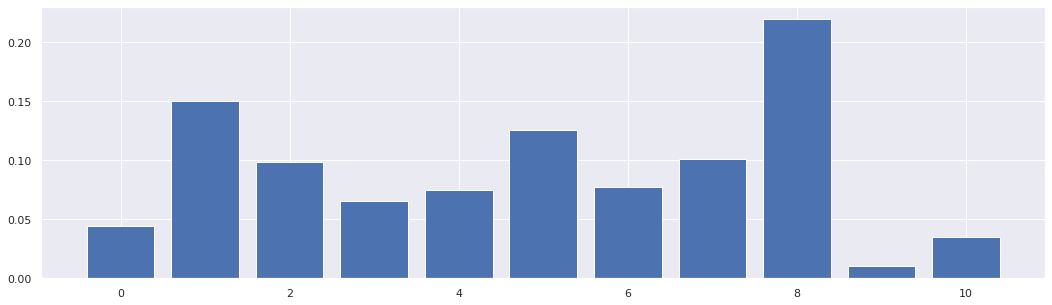

In [ ]:

# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
x_train.head

<bound method NDFrame.head of        person_age  person_income  person_home_ownership  person_emp_length  \
12657          25          66300                      0                9.0   
11611          22          75000                      0                6.0   
18223          31         105400                      3                2.0   
24772          35          75000                      0                5.0   
30770          36          65000                      0                6.0   
...           ...            ...                    ...                ...   
29802          39          38500                      0                7.0   
5390           25          69000                      3                5.0   
860            26         148000                      3                1.0   
15795          26         175000                      0                0.0   
23654          27          65000                      0               11.0   

       loan_intent  loan_grade  l

In [ ]:
#Hyper-Paramter tuning for RF Classifier

from sklearn.model_selection import GridSearchCV

# Define the grid
param_grid = {
'n_estimators': [50, 100, 200, 300],
'min_samples_leaf': [1, 5, 10],
'max_depth': [2, 4, 6, 8, 10],
'max_features': ['auto', 'sqrt'],
'bootstrap': [True, False]}

# Instantiate GridSearchCV
model_gridsearch = GridSearchCV(
estimator=RandomF,
param_grid=param_grid,
scoring='accuracy',
n_jobs=4,
cv=5,
refit=True,
return_train_score=True)




In [ ]:
#import time
# Record the current time 
start = time
# Fit the selected model
model_gridsearch.fit(x_train_res, y_train_res)
# Print the time spend and number of models ran
#print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % ((time() - start), len(model_gridsearch.cv_results_['params'])))

NameError: ignored

In [ ]:
# Predict on the test set and call accuracy
y_pred_grid = model_gridsearch.predict(x_test)
accuracy_random = accuracy_score(y_test, y_pred_grid)
print(accuracy_random)

In [ ]:
print(model_gridsearch.best_params_)
print('Random Forest classifier', '\n',classification_report(y_test, model_gridsearch.predict(x_test)))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4, batch_size=1, verbose=1)

In [ ]:
preds_seq = model.predict(x_test)
score = model.evaluate(x_test, y_test,verbose=1)
print('Accuracy score for neural model:{}'.format(score))
auc_score=roc_auc_score(y_test,preds_seq)
print('ROC score for neural model:{}'.format(score))

'''tn, fp, fn, tp = confusion_matrix(list(y_test), list(preds_seq), labels=[0, 1]).ravel()
print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)'''

print('Random Forest classifier', '\n',classification_report(y_test, preds_seq))

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE,ADASYN

sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

KNN2 = KNeighborsClassifier(n_neighbors=150)
KNN2.fit(x_train_res, y_train_res)
KNN2_preds = KNN2.predict(x_test)
KNN2_preds_proba = KNN2.predict_proba(x_test)
print(classification_report(y_test, KNN2.predict(x_test)))

log_roc = roc_auc_score(y_test,KNN2_preds)
log_acc = accuracy_score(y_test,KNN2_preds)

print('ROC score for KNN model: %.2f%%'% (log_roc*100))
print('Prediction Accuracy score for KNN model: %.2f%%'% (log_acc*100))

'''#Logistic Regression After SMOTE
lg2 = LogisticRegression(random_state=42)

lg2.fit(x_train_res, y_train_res)
preds2 = lg2.predict(x_test)
preds_proba = lg2.predict_proba(x_test)
print('Logistic Regression', '\n',classification_report(y_test, preds2))  

print('roc %.2%%:', roc_auc_score(y_test,preds2))'''


              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7613
           1       0.49      0.64      0.55      2162

    accuracy                           0.77      9775
   macro avg       0.69      0.72      0.70      9775
weighted avg       0.80      0.77      0.78      9775

ROC score for KNN model: 72.24%
Prediction Accuracy score for KNN model: 77.03%


"#Logistic Regression After SMOTE\nlg2 = LogisticRegression(random_state=42)\n\nlg2.fit(x_train_res, y_train_res)\npreds2 = lg2.predict(x_test)\npreds_proba = lg2.predict_proba(x_test)\nprint('Logistic Regression', '\n',classification_report(y_test, preds2))  \n\nprint('roc %.2%%:', roc_auc_score(y_test,preds2))"

In [ ]:
#Hyper parameter tuning for KNN
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
      
KNN_grid = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

KNN_grid_mod = KNN_grid.fit(x_train_res, y_train_res)

# find the best score
KNN_grid_mod.best_score_

# get the hyperparameters with the best score
KNN_grid_mod.best_params_

'''# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)'''

Fitting 3 folds for each of 36 candidates, totalling 108 fits


'# get a prediction\ny_hat = knn.predict(X_train)\ny_knn = knn.predict(X_test)'

In [ ]:
# find the best score
print(KNN_grid_mod.best_score_)

# get the hyperparameters with the best score
KNN_grid_mod.best_params_

0.8501681421839947


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
# use the best hyperparameters
knn_best = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn_best.fit(x_train_res, y_train_res)
# get a prediction
y_hat = knn_best.predict(x_train_res)
y_knn = knn_best.predict(x_test)

print('Training set accuracy: ', metrics.accuracy_score(y_train_res, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.8081841432225064


In [ ]:
#Random forest After SMOTE
RandomF2 = RandomForestClassifier()

RandomF2.fit(x_train_res, y_train_res)
preds_rf2 = RandomF2.predict(x_test)
preds_proba2 = RandomF2.predict_proba(x_test)
print('Random Forest classifier', '\n',classification_report(y_test, RandomF2.predict(x_test)))
print('ROC score for Random Forest is:', roc_auc_score(y_test,preds_rf2))

Random Forest classifier 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      7613
           1       0.80      0.75      0.77      2162

    accuracy                           0.90      9775
   macro avg       0.86      0.85      0.86      9775
weighted avg       0.90      0.90      0.90      9775

ROC score for Random Forest is: 0.8496440858442027


In [ ]:
accuracy = accuracy_score(y_test, preds2)
precision = precision_score(y_test, preds2)
recall = recall_score(y_test, preds2)
fscore = f1_score(y_test, preds2)

print('Accuracy predicted: %.2f%%' % (accuracy * 100.0))
print('Precision: %.2f%%' % (precision * 100.0))
print('Recall: %.2f%%' % (recall * 100.0))
print('F1_score: %.2f%%' % (fscore * 100.0))

Accuracy predicted: 70.39%
Precision: 41.11%
Recall: 78.26%
F1_score: 53.90%


In [ ]:
#XG Boost

xgb2 = xgb.XGBClassifier(objective="binary:logistic", random_state=42) 

xgb2.fit(x_train_res, y_train_res)
preds_xgb2 = xgb2.predict(x_test)
preds_proba2 = xgb2.predict_proba(x_test)
print('XG Boost', '\n',classification_report(y_test, xgb2.predict(x_test)))
print('ROC score for XG BOOST is:', roc_auc_score(y_test,preds_xgb2))

In [ ]:
model2 = Sequential()

model2.add(Dense(8, activation='relu', input_shape=(11,)))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])
model2.fit(x_train_res,y_train_res,epochs=4, batch_size=1, verbose=1)


preds_seq2 = model2.predict(x_test)
score = model2.evaluate(x_test, y_test,verbose=1)
print('Accuracy score for neural model:{}'.format(score))
auc_score=roc_auc_score(y_test,preds_seq2)
print('ROC score for neural model:{}'.format(score))



In [ ]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

# predict probabilities for test set
yhat_probs = model2.predict(x_test, verbose=0)
# predict crisp classes for test set
#yhat_classes = model2.predic(x_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_probs.round())
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_probs.round())
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_probs.round())
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_probs.round())
print('F1 score: %f' % f1)

In [ ]:
#Logistic Regression grid searchcv after SMOTE

from sklearn.linear_model import LogisticRegression
grid={"C":c, "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train_res,y_train_res)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.7460246360582308


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#Define Params
xgb_params = {
"learning_rate" : [0.05,0.1,0.3],
"max_depth"  : [3,5,7,9],
"max_delta_step" : [3,5,7],
'sampling method' : ["uniform","gradient_based"]
}

#Define model
xgb_grid = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

#grid search
xgb_gridsearch = GridSearchCV(estimator=xgb_grid,param_grid=xgb_params,n_jobs=1,cv=3,scoring='accuracy')


In [ ]:
xgb_gridresult = xgb_gridsearch.fit(x_train_res,y_train_res)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",xgb_gridresult.best_params_)
print("accuracy :",xgb_gridresult.best_score_)


tuned hpyerparameters :(best parameters)  {'learning_rate': 0.3, 'max_delta_step': 3, 'max_depth': 9, 'sampling method': 'uniform'}
accuracy : 0.930488372066448
